In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
image = cv2.imread('demo5.jpg') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

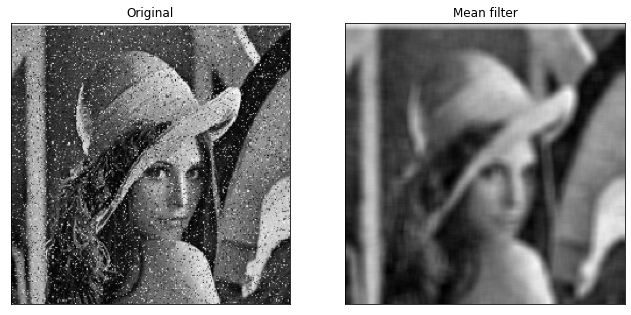

In [26]:
image2 = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
figure_size = 9
new_image = cv2.blur(image2,(figure_size, figure_size))
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

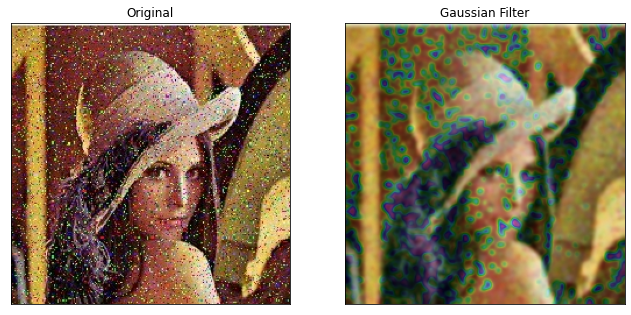

In [28]:
new_image = cv2.GaussianBlur(image, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()


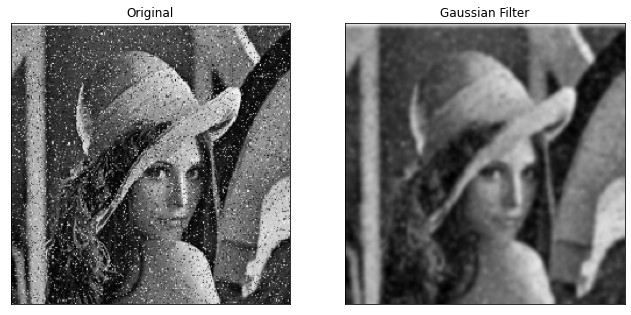

In [30]:
new_image_gauss = cv2.GaussianBlur(image2, (figure_size, figure_size),0)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image_gauss, cmap='gray'),plt.title('Gaussian Filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
new_image = cv2.medianBlur(image, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

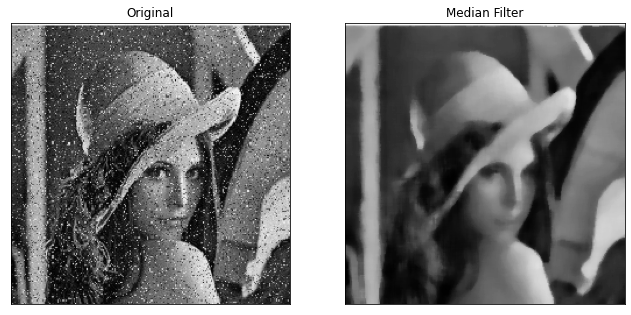

In [33]:
new_image = cv2.medianBlur(image2, figure_size)
plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('Median Filter')
plt.xticks([]), plt.yticks([])
plt.show()

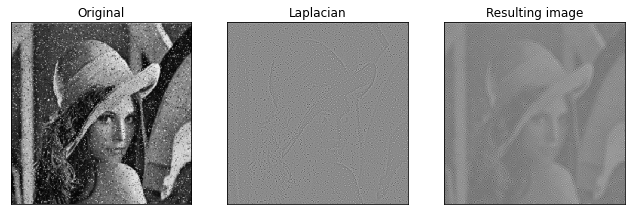

In [35]:
new_image = cv2.Laplacian(image2,cv2.CV_64F)
plt.figure(figsize=(11,6))
plt.subplot(131), plt.imshow(image2, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(new_image, cmap='gray'),plt.title('Laplacian')
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(image2 + new_image, cmap='gray'),plt.title('Resulting image')
plt.xticks([]), plt.yticks([])
plt.show()

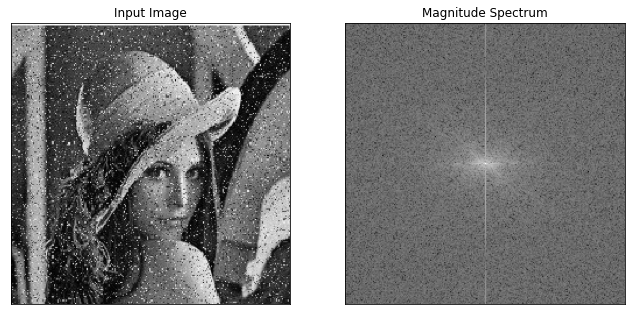

In [37]:
dft = cv2.dft(np.float32(image2),flags = cv2.DFT_COMPLEX_OUTPUT)
# shift the zero-frequncy component to the center of the spectrum
dft_shift = np.fft.fftshift(dft)
# save image of the image in the fourier domain.
magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(image2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

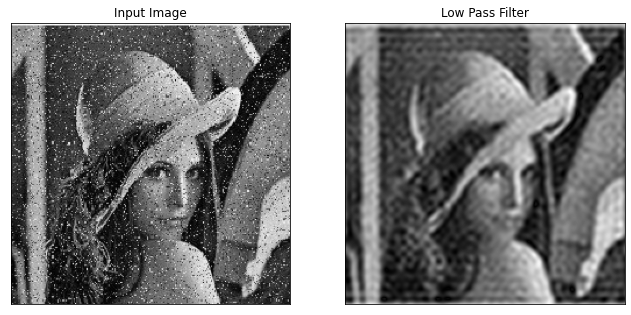

In [38]:
rows, cols = image2.shape
crow,ccol = rows//2 , cols//2
# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
# plot both images
plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(image2, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()